<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Collect-Data" data-toc-modified-id="Collect-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Collect Data</a></span></li><li><span><a href="#Visualizing-the-Data-with-WordClouds" data-toc-modified-id="Visualizing-the-Data-with-WordClouds-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualizing the Data with WordClouds</a></span></li><li><span><a href="#Analyze-Sentiment" data-toc-modified-id="Analyze-Sentiment-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analyze Sentiment</a></span><ul class="toc-item"><li><span><a href="#Using-nltk" data-toc-modified-id="Using-nltk-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Using nltk</a></span></li><li><span><a href="#Calculate-Polarity-Scores" data-toc-modified-id="Calculate-Polarity-Scores-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Calculate Polarity Scores</a></span></li><li><span><a href="#Sentiment:-reliable-vs-unreliable" data-toc-modified-id="Sentiment:-reliable-vs-unreliable-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Sentiment: reliable vs unreliable</a></span></li></ul></li><li><span><a href="#Frequency-Distribution" data-toc-modified-id="Frequency-Distribution-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Frequency Distribution</a></span></li><li><span><a href="#Cleaning" data-toc-modified-id="Cleaning-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Cleaning</a></span></li><li><span><a href="#Topic-Modeling-with-Gensim/LDA" data-toc-modified-id="Topic-Modeling-with-Gensim/LDA-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Topic Modeling with Gensim/LDA</a></span><ul class="toc-item"><li><span><a href="#Reliable" data-toc-modified-id="Reliable-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Reliable</a></span></li><li><span><a href="#Unreliable" data-toc-modified-id="Unreliable-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Unreliable</a></span></li></ul></li><li><span><a href="#Interactive-topic-model-visualization-using-sklearn" data-toc-modified-id="Interactive-topic-model-visualization-using-sklearn-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Interactive topic model visualization using sklearn</a></span><ul class="toc-item"><li><span><a href="#Definitions-of-visual-elements-in-LDAvis" data-toc-modified-id="Definitions-of-visual-elements-in-LDAvis-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Definitions of visual elements in LDAvis</a></span></li><li><span><a href="#Let-look-what-the-difference-is-between-negative-and-positive-news-content" data-toc-modified-id="Let-look-what-the-difference-is-between-negative-and-positive-news-content-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Let look what the difference is between negative and positive news content</a></span><ul class="toc-item"><li><span><a href="#Negative-Content" data-toc-modified-id="Negative-Content-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Negative Content</a></span></li><li><span><a href="#Positive-Content" data-toc-modified-id="Positive-Content-8.2.2"><span class="toc-item-num">8.2.2&nbsp;&nbsp;</span>Positive Content</a></span></li></ul></li></ul></li><li><span><a href="#Let's-narrow-it-down-to-two-categories" data-toc-modified-id="Let's-narrow-it-down-to-two-categories-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Let's narrow it down to two categories</a></span><ul class="toc-item"><li><span><a href="#Fake-News-Content" data-toc-modified-id="Fake-News-Content-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Fake News Content</a></span></li><li><span><a href="#Reliable-News-Content" data-toc-modified-id="Reliable-News-Content-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Reliable News Content</a></span></li></ul></li><li><span><a href="#Linguistic-Features" data-toc-modified-id="Linguistic-Features-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Linguistic Features</a></span><ul class="toc-item"><li><span><a href="#Visualizing-the-entity-recognizer" data-toc-modified-id="Visualizing-the-entity-recognizer-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Visualizing the entity recognizer</a></span></li><li><span><a href="#Dependency-parsing---Noun-chunks" data-toc-modified-id="Dependency-parsing---Noun-chunks-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Dependency parsing - Noun chunks</a></span></li></ul></li></ul></div>

## Libraries

In [14]:
from IPython.display import Image
from IPython.display import IFrame
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%config InlineBackend.figure_format ='retina'

from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import HtmlFormatter

import os
import re
import string
from collections import Counter
from tabulate import tabulate
from html.parser import HTMLParser

# import pyLDAvis
# import pyLDAvis.gensim
# import pyLDAvis.sklearn
# pyLDAvis.enable_notebook(local=True)

from tqdm import tqdm

import pandas as pd
import numpy as np

import spacy
from spacy import displacy

from collections import defaultdict

import gensim
from gensim import corpora

import nltk
from nltk import FreqDist
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from yellowbrick.text import FreqDistVisualizer

from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
%matplotlib inline

import plotly 
plotly.tools.set_credentials_file(username='osterburg', api_key='AwYwuawMn2kOq4r2tHci')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.io as pio
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go

import warnings
warnings.filterwarnings("ignore")

In [5]:
print(spacy.__version__)

2.0.18


In [6]:
print(plotly.__version__)

3.5.0


## Collect Data

In [7]:
filenames = [name for name in os.listdir('url_data/')]

In [8]:
lines = []
catgy = []

with tqdm() as progress:
    for fname in filenames:
        for line in open('url_data/' + fname):
            lines.append(line.rstrip('\n').rstrip("\'").lstrip("b\'"))
            catgy.append(fname.split('.')[0])

        progress.update()
    
df = pd.DataFrame({'news_content': lines, 'category': catgy})
df.to_csv('data/combined_news_content.csv', index=False)

10it [00:00, 30.47it/s]


In [9]:
df = pd.read_csv('data/combined_news_content.csv')
categories = df.category.value_counts()

labels = categories.index.tolist()
content_values = categories.values.tolist()

In [10]:
trace = go.Pie(labels=labels, values=content_values, hoverinfo='label+percent', textinfo='value', 
               title='Categories by Amount of Content')
iplot([trace])
# Image('images/CategoriesByURLs.png')

In [13]:
fig = py.get_figure('https://plot.ly/~osterburg/30', raw=True)
iplot(fig)

In [114]:
source_df = pd.read_csv('data/url_sources.csv')
categories = source_df.category.value_counts()

labels = categories.index.tolist()
url_values = categories.values.tolist()

In [115]:
trace = go.Pie(labels=labels, values=url_values, hoverinfo='label+percent', textinfo='value', 
               title="Categories by URL's")
# py.iplot([trace], filename='url_source_pie_chart', width=1400, height=800, auto_load=True)
# Image('images/CategoriesByURLs.png')
py.iplot([trace])

We have nearly double the number of url's categorized as fake vs reliable. But we were able to scrap far more data from reliable sources compare to any other.

## Visualizing the Data with WordClouds

In [12]:
filename = 'url_data/bias.txt'

lines = [line.rstrip('\n').rstrip("\'").lstrip("b\'") for line in open(filename)]
lines[0]

'She was merely following her dreams. That is the meaning of life now.'

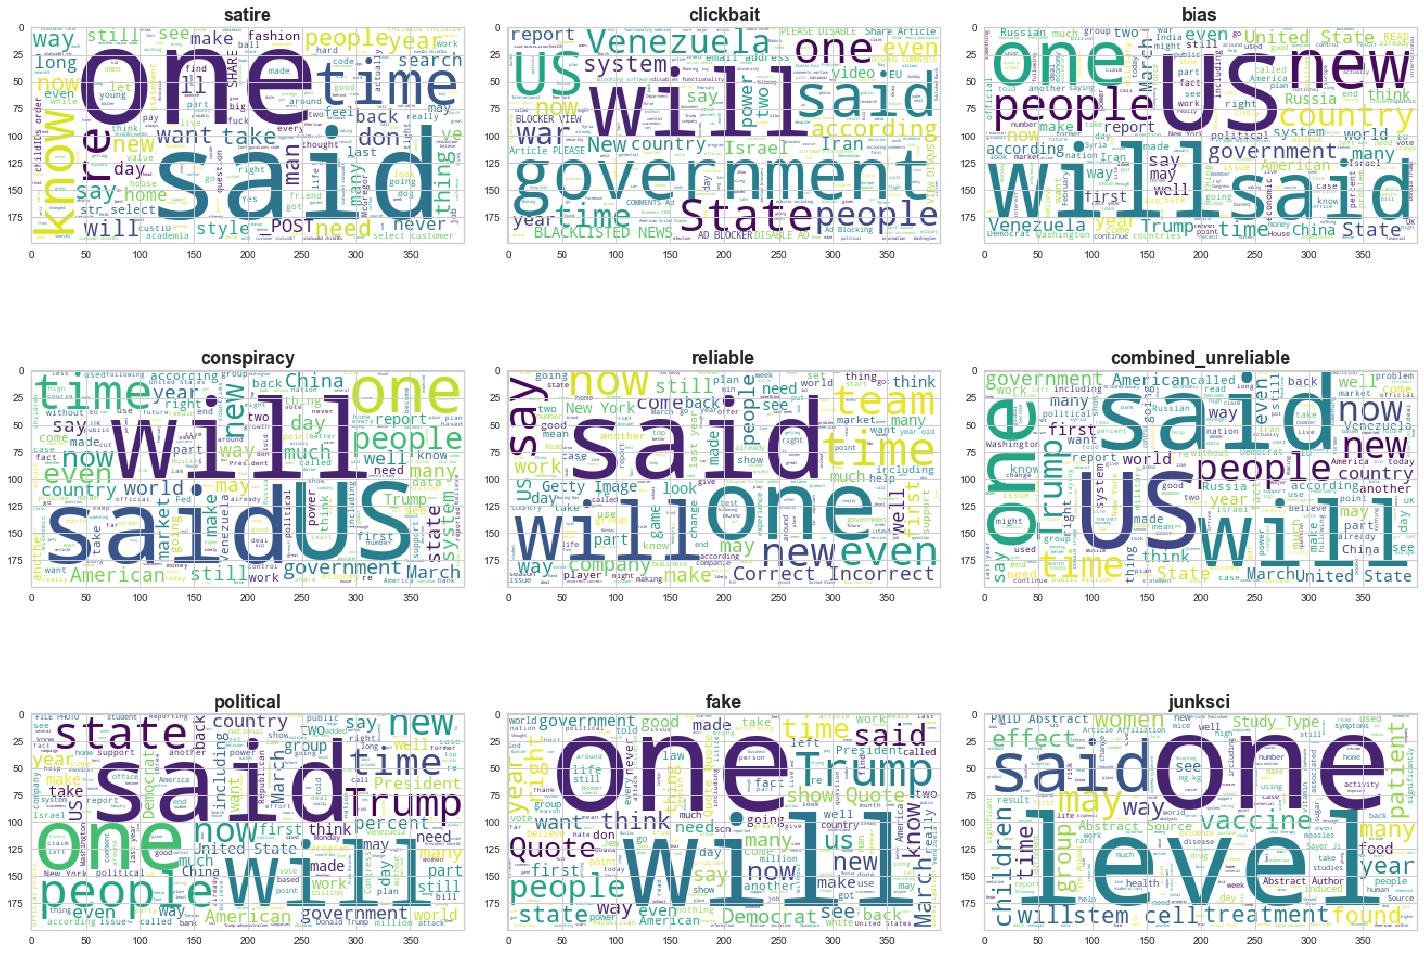

In [12]:
cat_list = df.category.unique().tolist()

ncol = 3
nrow = 3
fig = plt.figure(figsize=(20, 15))
ax = []

for i in range(ncol * nrow):
    news_content = df[df.category==cat_list[i]].news_content.tolist()
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=STOPWORDS,
        max_words=200,
        max_font_size=None, 
        random_state=1 
    ).generate(str(news_content))
    
    ax.append( fig.add_subplot(nrow, ncol, i+1) )
    ax[-1].set_title(cat_list[i], fontsize=18, fontweight='bold') 
    plt.imshow(wordcloud)

plt.tight_layout()
plt.show();

We can some differences but not necessarily to the point that we could create a good conclusion from it.

## Analyze Sentiment 

### Using nltk

For our sentiment analysis we will use the vader package from nltk (Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.).

Give a sentiment intensity score to sentences as four values, negative, neutral, positive and compound. Where the compound score value is normalized between -1 and 1 based on the sum of all lexicon ratings in the sentence.

In [13]:
# Instantiate SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

In [14]:
def text_sentiment_score(text):
    snt = sia.polarity_scores(text)
    print("{}\n\n{}".format(text, str(snt)))    

In [15]:
text_sentiment_score(df[df['category'] == 'political']['news_content'].iloc[0])

STATEMENT: CAP’s Tom Jawetz Applauds Introduction of H.R. 6, Calls on Congress to Pass Long-Overdue Protections for Dreamers, TPS and DED Beneficiaries Date: March 12, 2019 Contact: Rafael Medina Email: ‮g​r​o​.​s​s​e​r​g​o​r​p​n​a​c​i​r​e​m​a​&commat;​a​n​i​d​e​m​j​r‭ Washington, D.C. — Today, Reps. Lucille Roybal-Allard (D-CA), Nydia M. Velázquez (D-NY), and Yvette D. Clarke (D-NY) introduced H.R. 6, the Dream and Promise Act of 2019—an important bill that provides permanent protections for Dreamers, Temporary Protected Status (TPS) holders, and Deferred Enforced Departure (DED) beneficiaries. Tom Jawetz , vice president of Immigration Policy at the Center for American Progress, issued the following statement: While the Trump administration continues to spew anti-immigrant rhetoric— requesting , yet again, billions of dollars for the president’s vanity project of a border wall just weeks after Congress rejected his last request—House Democrats are making good on their promise to figh

In [16]:
text_sentiment_score(df[df['category'] == 'fake']['news_content'].iloc[0])

18 hours ago Shutterstock Atletico Madrid head to Northern Italy to take on Serie A champions Juventus in the second leg of their epic Champions League matchup. Despite being favored heading into the tie, Juventus find themselves with a substantial hole to climb out of as they conceded two goals to Atletico’s two central defenders at the Wanda Metropolitano Stadium in Madrid back on February 20. If Atletico can find a way to score a single goal at the Allianz, Juventus will need to score four goals against the notoriously stingy Spanish side to advance, as Atleti would hold the away goals advantage. Today’s second leg tie features two of the world’s biggest clubs that are full of some of the world’s best players, so make sure you find out how to live stream the action on your desktop, laptop, or mobile device here. Can’t watch today’s second leg matchup from the comfort of your couch? Find out how to live stream Atletico Madrid take on Juventus in today’s Champions League matchup below

### Calculate Polarity Scores

In [17]:
def sentiment_analyze(df):
    sentiments = []
    with tqdm() as progress:
        for i in range(df.shape[0]):
            line = df['news_content'].iloc[i]
            sentiment = sia.polarity_scores(line)
            sentiments.append([sentiment['neg'], sentiment['pos'], 
                               sentiment['neu'], sentiment['compound']])
        
            progress.update()
        
    df[['neg', 'pos', 'neu', 'compound']] = pd.DataFrame(sentiments)
    df['Negative'] = df['compound'] < -0.1
    df['Positive'] = df['compound'] > 0.1

    return df 

In [18]:
df_hist = sentiment_analyze(df)

24098it [02:27, 162.95it/s]


In [19]:
df_hist.head()

,news_content,category,neg,pos,neu,compound,Negative,Positive
0,"MANILA, Philippines ( The Adobo Chronicles, Ma...",satire,0.058,0.099,0.842,0.6808,False,True
1,"What boots a tree we cannot climb, Or cut, and...",satire,0.136,0.111,0.753,-0.8233,True,False
2,"Offers no great, grand accounting for the morr...",satire,0.157,0.213,0.629,0.9715,False,True
3,Home › The Rest › Video News › End of the Blue...,satire,0.095,0.159,0.746,0.8054,False,True
4,"It’s time to get some more hard-hitting, punch...",satire,0.115,0.150,0.735,0.9725,False,True


In [20]:
hist_data = df_hist.drop(['news_content', 'category', 'Negative', 'Positive'], axis=1)
hist_data.iplot(kind='histogram', subplots=True, shape=(4, 1), filename='sentiment_analyze_histogram')

In [21]:
percentiles = hist_data['compound'].describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
percentiles

count    24098.000000
mean         0.203178
std          0.763001
min         -1.000000
10%         -0.963790
20%         -0.774180
30%         -0.372100
40%          0.000000
50%          0.440400
60%          0.757120
70%          0.923090
80%          0.980500
90%          0.995500
max          1.000000
Name: compound, dtype: float64

In [22]:
# Group data together
hdata = [hist_data['neg'], hist_data['pos']]
labels = ['negative', 'positive']

# Create distplot with custom bin_size
fig = ff.create_distplot(hdata, labels, bin_size=.01)

py.iplot(fig, filename='posneg_distplot', width=1400, height=800, auto_load=True)
# Image('images/posneg_part1.png')

The draw time for this plot will be slow for clients without much RAM.


In [23]:
# get the top 30% from the reliable news (positive)
pos_df = df.loc[df['compound'] >= 0.7]
pos_news = pos_df['news_content'].to_list()

# get the bottom 30% from the reliable news (negative)
neg_df = df.loc[df['compound'] <= 0.3]
neg_news = neg_df['news_content'].to_list()

In [24]:
# Get the content length
pos_df['length'] = pos_df['news_content'].apply(len)
neg_df['length'] = neg_df['news_content'].apply(len)

In [25]:
# Group data together
hdata = [pos_df['length'], neg_df['length']]
labels = ['positive', 'negative']

# Create distplot with custom bin_size
fig = ff.create_distplot(hdata, labels, bin_size=.1)
py.iplot(fig, filename='NegPos_by_TextLength', width=1400, height=800, auto_load=True)
# Image('images/posneg_part2.png')

In [26]:
neg = abs(percentiles['30%'])
neu = abs(percentiles['70%'] - percentiles['30%'])
pos = abs(percentiles['max'] - percentiles['70%'])

labels = ['Negative Content', 'Neutral Content', 'Positive Content']
values = [neg, neu, pos]

In [27]:
trace = go.Pie(labels=labels, values=values, hoverinfo='label+percent', textinfo='value', 
               title='Positive-Neutral-Negative Content Distribution')
py.iplot([trace], filename='ContentDistChart', width=1400, height=800, auto_load=True)
# Image('images/ContentDist.png')

### Sentiment: reliable vs unreliable

In [28]:
reliable_df   = df_hist[df_hist['category'] == 'reliable']

In [29]:
unreliable_df = df_hist[(df_hist.category != 'reliable') & (df_hist.category != 'political') &
                        (df_hist.category != 'junksci') & (df_hist.category != 'clickbait') &
                        (df_hist.category != 'satire')]

In [30]:
print('Number of reliable articles: {}'.format(reliable_df.shape[0]))
print('Number of unreliable articles: {}'.format(unreliable_df.shape[0]))

Number of reliable articles: 14856
Number of unreliable articles: 7084


In [31]:
# Randomly sample 7 elements from your dataframe
reliable_df = reliable_df.sample(n=2500)
unreliable_df = unreliable_df.sample(n=2500)

In [32]:
v = reliable_df['compound'].values
v = np.around(v, decimals=2)
v = sorted(v.tolist())

c = Counter(v)
ry = np.array([(float(i)/sum(c.values()))*100 for i in c.values()])
rx = np.array(list(c.keys()))

In [33]:
v = unreliable_df['compound'].values
v = np.around(v, decimals=2)
v = sorted(v.tolist())

c = Counter(v)
uy = np.array([(float(i)/sum(c.values()))*100 for i in c.values()])
ux = np.array(list(c.keys()))

In [34]:
trace0 = go.Scatter(
    x = rx,
    y = ry,
    name = 'reliable'
)
trace1 = go.Scatter(
    x = ux,
    y = uy,
    name = 'unreliable'
)

data = [trace0, trace1]

# Edit the layout
layout = dict(title = 'Sentiment: reliabel vs unreliable',
              xaxis = dict(title = 'Compound'),
              yaxis = dict(title = 'Percent Articles'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig)
# Image('images/Sentiment_compound.png')

In [35]:
trace1 = go.Bar(
    x=['negative', 'neutral', 'positive', 'compound'],
    y=[reliable_df['neg'].mean(), 
       reliable_df['neu'].mean(),
       reliable_df['pos'].mean(),
       reliable_df['compound'].mean()],
    name='reliable'
)
trace2 = go.Bar(
    x=['negative', 'neutral', 'positive', 'compound'],
    y=[unreliable_df['neg'].mean(), 
       unreliable_df['neu'].mean(),
       unreliable_df['pos'].mean(),
       unreliable_df['compound'].mean()],
    name='unreliable'
)

data = [trace1, trace2]
layout = go.Layout(
    title = 'Mean Sentiment: reliabel vs unreliable',
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='mean_sentiment', width=1400, height=800, auto_load=True)
Image('images/MeanSentiment.png')

## Frequency Distribution

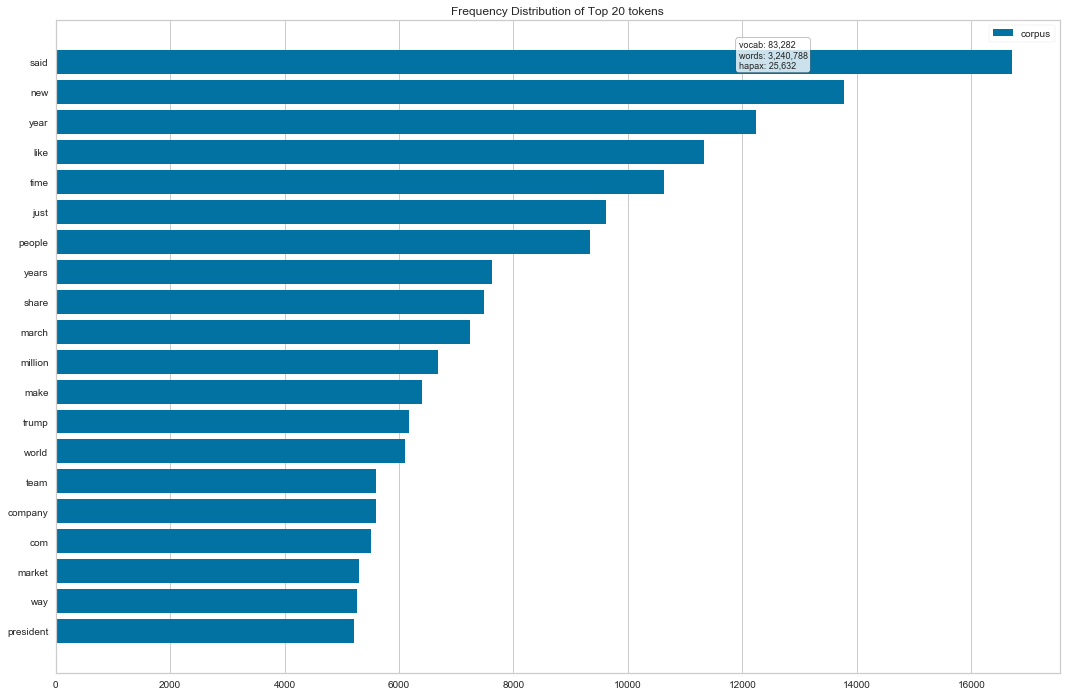

In [36]:
# Instantiate CountVectorizer object and fit positive news and get their features
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b')
docs = tf_vectorizer.fit_transform(pos_news)
features = tf_vectorizer.get_feature_names()

plt.figure(figsize=(18, 12))
plt.title('20 most frequent words used in POSITIVE news\n', fontweight='bold')

# Instantiate and fit FreqDistVisualizer, plot the top 20 most frequent words
visualizer = FreqDistVisualizer(features=features, n=20)
visualizer.fit(docs)
visualizer.poof();

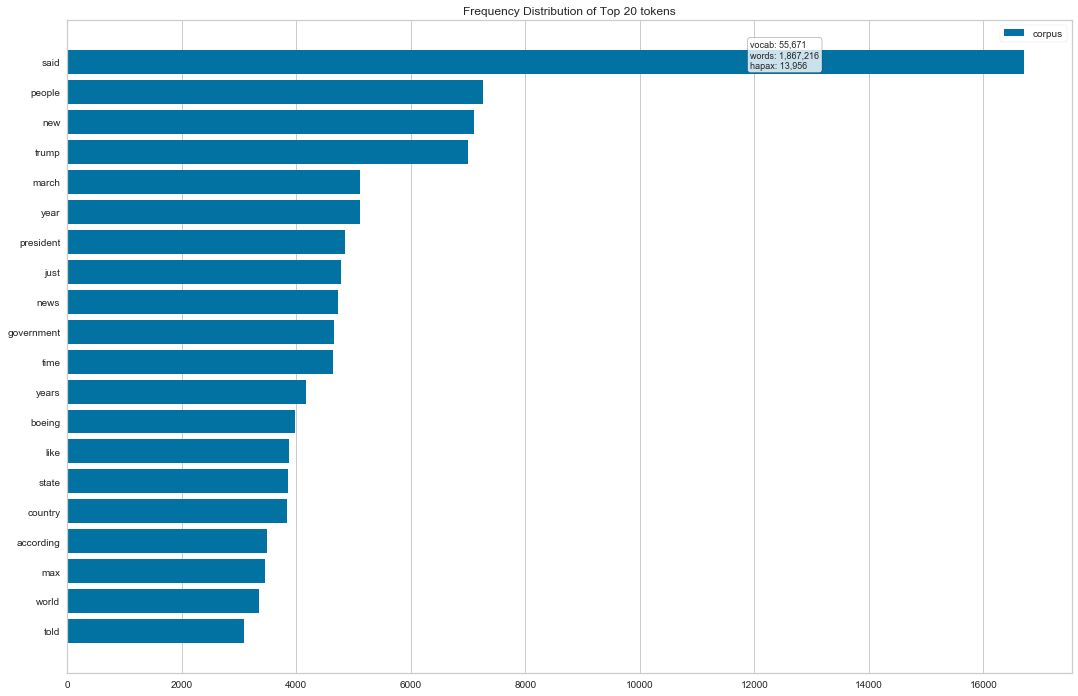

In [37]:
# Instantiate CountVectorizer object and fit negative news and get their features
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b')
docs = tf_vectorizer.fit_transform(neg_news)
features = tf_vectorizer.get_feature_names()

plt.figure(figsize=(18, 12))
plt.title('20 most frequent words used in NEGATIVE news\n', fontweight='bold')

# Instantiate and fit FreqDistVisualizer, plot the top 20 most frequent words
visualizer = FreqDistVisualizer(features=features, n=20)
visualizer.fit(docs)
visualizer.poof();

## Cleaning

In [38]:
cachedStopWords = stopwords.words("english")
cachedStopWords += list(string.punctuation)
cachedStopWords += list(string.digits)
cachedStopWords += ['““', "’’", '–', 'th']

wnl = WordNetLemmatizer()
nltk_words = set(nltk.corpus.words.words())

# Strip HTML from strings in Python
# https://stackoverflow.com/a/925630/5983691
class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.fed = []
        
    def handle_data(self, d):
        self.fed.append(d)
        
    def get_data(self):
        return ''.join(self.fed)

def remove_html(text):
    s = MLStripper()
    s.feed(text)
    return s.get_data()

def stopwords_lemmatizing(text):
    return [wnl.lemmatize(word) for word in text.split() if word not in cachedStopWords]

def remove_digits(text):
    result =  ''.join(i for i in text if not i.isdigit()).lower()
    return ' '.join(result.split())

def remove_newlines(text):
    return text.replace('\\n', '').replace('\\r', '').replace('\n', '').replace('\r', '').replace('\\', '')

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [39]:
def clean_text(filename):
    text = [line.rstrip('\n').rstrip("\'").lstrip("b\'") for line in open(filename)]
    cleaned = [stopwords_lemmatizing(remove_digits(remove_newlines(remove_punctuation(remove_html(line)))))
               for line in lines]
    
    return text, cleaned

In [40]:
reliable_texts, reliable_cleaned_texts = clean_text('url_data/reliable.txt')

In [42]:
read_files = ['url_data/unreliable.txt', 'url_data/fake.txt', 'url_data/bias.txt', 'url_data/conspiracy.txt']
outfile_name = 'url_data/combined_unreliable.txt'

with open(outfile_name, "w") as outfile:
    for f in read_files:
        with open(f, "r") as infile:
            outfile.write(infile.read())

In [43]:
unreliable_texts, unreliable_cleaned_texts = clean_text("url_data/combined_unreliable.txt")

## Topic Modeling with Gensim/LDA

### Reliable

In [46]:
# The text given needs to be a list of list where the words a seperated, ie. [['test', 'more'], ['stuff']]
dictionary = corpora.Dictionary(reliable_cleaned_texts)
# dictionary.save('data/reliable_text.dict') 

corpus = [dictionary.doc2bow(text) for text in reliable_cleaned_texts]
# corpora.MmCorpus.serialize('data/reliable_text_corpus.mm', corpus)

lda = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=20)
topics = lda.print_topics(num_words=5)
for topic in topics:
    print('topic #{}: {}'.format(topic[0], topic[1]))

topic #0: 0.005*"year" + 0.005*"one" + 0.005*"new" + 0.005*"u" + 0.004*"would"
topic #1: 0.153*"fairfax" + 0.077*"tshirt" + 0.038*"hartsough" + 0.037*"identifying" + 0.036*"calmly"
topic #2: 0.032*"u" + 0.017*"korea" + 0.017*"—" + 0.016*"japan" + 0.013*"would"
topic #3: 0.015*"u" + 0.009*"venezuela" + 0.008*"said" + 0.006*"state" + 0.006*"country"
topic #4: 0.128*"exxonmobil" + 0.128*"arlington" + 0.006*"identifying" + 0.000*"hee" + 0.000*"🇺🇸"
topic #5: 0.004*"state" + 0.004*"right" + 0.004*"russian" + 0.004*"would" + 0.004*"trump"
topic #6: 0.009*"said" + 0.008*"country" + 0.007*"iran" + 0.007*"deal" + 0.007*"minister"
topic #7: 0.004*"der" + 0.003*"die" + 0.002*"buttigieg" + 0.001*"im" + 0.001*"von"
topic #8: 0.020*"war" + 0.014*"u" + 0.011*"people" + 0.010*"one" + 0.008*"world"
topic #9: 0.086*"korea’s" + 0.086*"lima" + 0.086*"invader" + 0.043*"enforces" + 0.043*"nullified"


### Unreliable

In [47]:
# The text given needs to be a list of list where the words a seperated, ie. [['test', 'more'], ['stuff']]
dictionary = corpora.Dictionary(unreliable_cleaned_texts)
# dictionary.save('data/reliable_text.dict') 

corpus = [dictionary.doc2bow(text) for text in unreliable_cleaned_texts]
# corpora.MmCorpus.serialize('data/reliable_text_corpus.mm', corpus)

lda = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=20)
topics = lda.print_topics(num_words=5)
for topic in topics:
    print('topic #{}: {}'.format(topic[0], topic[1]))

topic #0: 0.146*"winning”" + 0.000*"turboprop" + 0.000*"oco" + 0.000*"il" + 0.000*"di"
topic #1: 0.002*"cooky" + 0.001*"koerner" + 0.001*"challenger" + 0.001*"reserved" + 0.001*"cookie"
topic #2: 0.007*"u" + 0.006*"said" + 0.004*"new" + 0.004*"state" + 0.004*"year"
topic #3: 0.003*"golan" + 0.003*"contrail" + 0.003*"stock" + 0.003*"sp" + 0.003*"der"
topic #4: 0.032*"u" + 0.017*"korea" + 0.017*"—" + 0.016*"japan" + 0.013*"would"
topic #5: 0.012*"boeing" + 0.011*"max" + 0.008*"airline" + 0.008*"iran" + 0.008*"aircraft"
topic #6: 0.021*"war" + 0.013*"u" + 0.013*"people" + 0.010*"one" + 0.009*"world"
topic #7: 0.006*"military" + 0.005*"state" + 0.005*"could" + 0.004*"treaty" + 0.004*"russian"
topic #8: 0.019*"war" + 0.015*"u" + 0.010*"fairfax" + 0.010*"—" + 0.009*"united"
topic #9: 0.126*"needing" + 0.126*"excludes" + 0.001*"u" + 0.001*"enforces" + 0.001*"authentic"


## Interactive topic model visualization using sklearn

pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

### Definitions of visual elements in LDAvis

Here we define the dimensions of the visual elements in LDAvis.  There are essentially four sets of visual elements that can be displayed, depending on the state of the visualization.They are:

1. **Default Topic Circles**: $K$ circles, one to represent each topic, whose areas are set to be proportional to the proportions of the topics across the $N$ total tokens in the corpus. The default topic circles are displayed when no term is highlighted.
2. **Red Bars**: $K×W$ red horizontal bars, each of which represents the estimated number of times a given term was generated by a given topic.  When a topic is selected, we show the red bars for the $R$ most relevant terms for the selected topic, where $R= 30$ by default (see Sievert and Shirley (2014) for the definition of relevance).
3. **Blue Bars**: $W$ blue horizontal bars,  one to represent the overall frequency of each term in the corpus. When no topic is selected, we display the blue bars for the $R$ most salient terms in the corpus, and when a topic is selected, we display the blue bars for the $R$ most relevant terms.  See Chuang et al.  (2012) for the definition of the saliency of a term in a topic model.
4. **Topic-Term Circles**: $K×W$ circles whose areas are set to be proportional to the frequencies with which a given term is estimated to have been generated by the topics. When a given term, $w$, is highlighted, the $K$ default circles transition (i.e. their areas change) to the $K$ topic-term circles for term $w$.

### Let look what the difference is between negative and positive news content

#### Negative Content

In [48]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(neg_news)
print(dtm_tf.shape)

(11141, 13673)


In [49]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

dtm_tfidf = tfidf_vectorizer.fit_transform(neg_news)
print(dtm_tfidf.shape)

(11141, 13673)


In [50]:
# for TF DTM
# lda_tf = LatentDirichletAllocation(n_topics=20, random_state=0)
# lda_tf.fit(dtm_tf)

# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_topics=20, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=20, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [52]:
vis_data = pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tf_vectorizer)
pyLDAvis.prepare(vis_data)

#### Positive Content

In [53]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(pos_news)
print(dtm_tf.shape)

(10166, 18623)


In [54]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

dtm_tfidf = tfidf_vectorizer.fit_transform(pos_news)
print(dtm_tfidf.shape)

(10166, 18623)


In [55]:
# for TF DTM
# lda_tf = LatentDirichletAllocation(n_topics=20, random_state=0)
# lda_tf.fit(dtm_tf)

# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_topics=20, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=20, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [56]:
vis_data = pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tf_vectorizer)
pyLDAvis.display(vis_data)

## Let's narrow it down to two categories

### Fake News Content

In [100]:
news_content = df[df.category=='fake'].news_content.tolist()

In [101]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(news_content)
print(dtm_tf.shape)

(697, 839)


In [102]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

dtm_tfidf = tfidf_vectorizer.fit_transform(news_content)
print(dtm_tfidf.shape)

(697, 839)


In [103]:
# for TF DTM
# lda_tf = LatentDirichletAllocation(n_topics=20, random_state=0)
# lda_tf.fit(dtm_tf)

# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_topics=20, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=20, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=20, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [110]:
vis_data = pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tf_vectorizer)
pyLDAvis.display(vis_data, local=True)

### Reliable News Content

In [62]:
news_content = df[df.category=='reliable'].news_content.tolist()

In [63]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(news_content)
print(dtm_tf.shape)

(14856, 19493)


In [64]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

dtm_tfidf = tfidf_vectorizer.fit_transform(news_content)
print(dtm_tfidf.shape)

(14856, 19493)


In [65]:
# for TF DTM
# lda_tf = LatentDirichletAllocation(n_topics=20, random_state=0)
# lda_tf.fit(dtm_tf)

# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_topics=20, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=20, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [66]:
vis_data = pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tf_vectorizer)
pyLDAvis.display(vis_data)

## Linguistic Features

### Visualizing the entity recognizer
The entity visualizer, `ent`, highlights named entities and their labels in a text.

In [67]:
nlp = spacy.load('en_core_web_sm')

In [68]:
temp_df = df[(df['category'] =='reliable') & (df['Positive'] == True)]
temp_df.sort_values(by='pos', ascending=False, inplace=True)
temp_df.head()

,news_content,category,neg,pos,neu,compound,Negative,Positive
12612,"Like, cause, like if you like to like stuff an...",reliable,0.000,0.712,0.288,0.9671,False,True
6963,GOOD LUCK www­­­.­­­inkprofit­­­.comⓇ <­­:) <3...,reliable,0.000,0.703,0.297,0.9651,False,True
3075,God bless this beautiful little girl! Hair or ...,reliable,0.102,0.618,0.279,0.9018,False,True
16525,Jocelyn Beyea I agree. It would help everyone ...,reliable,0.000,0.608,0.392,0.8519,False,True
5275,downgrades Class M-3 from Securitized Asset B...,reliable,0.000,0.571,0.429,0.8074,False,True


In [84]:
text = ''.join(temp_df.iloc[0:10, 0].tolist())

In [86]:
pos_doc = nlp(temp_df['news_content'].iloc[0])
pos_doc.user_data['title'] = 'Top positive news conten'
displacy.render(pos_doc, style='ent', jupyter=True)

In [87]:
temp_df = df[(df['category'] =='reliable') & (df['Negative'] == True)]
temp_df.sort_values(by='neg', ascending=False, inplace=True)
temp_df.head()

,news_content,category,neg,pos,neu,compound,Negative,Positive
16888,Ryan Geibl Stop perpetrating democrat LIES and...,reliable,0.652,0.000,0.348,-0.8816,True,False
16580,Insecure white wankers hiding behind a banner ...,reliable,0.595,0.000,0.405,-0.8316,True,False
6236,Murderer and rapist received longest minimum s...,reliable,0.565,0.068,0.366,-0.8885,True,False
12487,Figures! Another insane comment from a lunatic...,reliable,0.565,0.000,0.435,-0.7568,True,False
3104,Always a tragedy when a jet goes down. Lose a ...,reliable,0.558,0.000,0.442,-0.8779,True,False


In [89]:
neg_doc = nlp(temp_df['news_content'].iloc[0])
pos_doc.user_data['title'] = 'Top negative news content'
displacy.render(neg_doc, style='ent', jupyter=True)

### Dependency parsing - Noun chunks

+ **Text**: The original noun chunk text.
+ **Root text**: The original text of the word connecting the noun chunk to the rest of the parse.
+ **Root dep**: Dependency relation connecting the root to its head.
+ **Root head text**: The text of the root token's head.

In [91]:
headers = ['TEXT','ROOT.TEXT','ROOT.DEP_','ROOT.HEAD.TEXT']

chunk_list = []
for chunk in pos_doc.noun_chunks:
    chunk_list.append([chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text])
    
print(tabulate(chunk_list, headers=headers))

TEXT    ROOT.TEXT    ROOT.DEP_    ROOT.HEAD.TEXT
------  -----------  -----------  ----------------
you     you          nsubj        like
stuff   stuff        dobj         like
stuff   stuff        conj         stuff


In [92]:
chunk_list = []
for chunk in neg_doc.noun_chunks:
    chunk_list.append([chunk.text, chunk.root.text, chunk.root.dep_, chunk.root.head.text])
    
print(tabulate(chunk_list, headers=headers))

TEXT                        ROOT.TEXT    ROOT.DEP_    ROOT.HEAD.TEXT
--------------------------  -----------  -----------  ----------------
Ryan Geibl                  Geibl        nsubj        Stop
perpetrating democrat LIES  LIES         dobj         Stop
anti semitism moron         moron        conj         Stop
